In [25]:
import sys, os

# get the absolute path to the FUB FVS-Solver
pathname = os.path.dirname(os.getcwd())
pathname = os.path.abspath(pathname)
FVS_path = pathname.split('FiniteVolumeSolver')[0]+'FiniteVolumeSolver'
# print(FVS_path) 
sys.path.append(FVS_path+'/extra/')
import amrex.plotfiles as da

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py
import itertools

def GetSize(path):
    file = h5py.File(path, mode='r')
    n = file["times"].shape[0]
    file.close()
    return n

tube_path = FVS_path+"/build_2D-Release/ConvergentNozzleAxi/Tube.h5"
plenum_path = FVS_path+"/build_2D-Release/ConvergentNozzleAxi/Plenum.h5"

import mpld3
mpld3.enable_notebook()
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 9,
    "axes.titlesize": 9,
    "axes.labelsize": 9,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7
}
# plt.style.use('seaborn')
plt.rcParams.update(tex_fonts)
plt.rcParams.update({'axes.grid' : False})


n = GetSize(tube_path)

datas, times, dict = da.h5_load_timeseries(tube_path)
extent_1d = da.h5_load_get_extent_1D(tube_path)


OSError: Unable to open file (unable to open file: name = '/srv/public/Maikel/FiniteVolumeSolver/build_2D-RelWithDebugInfo/ConvergentNozzleAxi/Tube.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

{'Density': 0, 'Momentum': 1, 'Energy': 2, 'Species_0': 3, 'Species_1': 4, 'Species_2': 5, 'Species_3': 6, 'Species_4': 7, 'Species_5': 8, 'Species_6': 9, 'Species_7': 10, 'Species_8': 11, 'Species_9': 12, 'Species_10': 13, 'Pressure': 14, 'SpeedOfSound': 15, 'Temperature': 16, 'HeatCapacityAtConstantPressure': 17, 'HeatCapacityRatio': 18}
0.0580137340054148


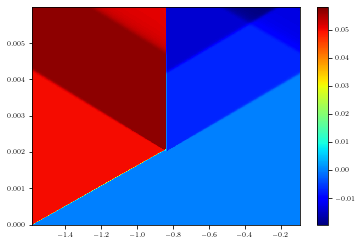

In [26]:

print(dict)
p = np.squeeze(datas[:, dict['Pressure'], :])
rho = np.squeeze(datas[:, dict['Density'], :])
rhou = np.squeeze(datas[:, dict['Momentum'], :])
u = rhou / rho
c = np.squeeze(datas[:, dict['SpeedOfSound'], :])
Ma = u / c
extent = (extent_1d[0], extent_1d[1], 0.0, times[-1])
im = plt.imshow(Ma, origin='lower', interpolation='none', extent=extent, aspect='auto', cmap='jet')
plt.colorbar(im)
print(np.max(Ma))

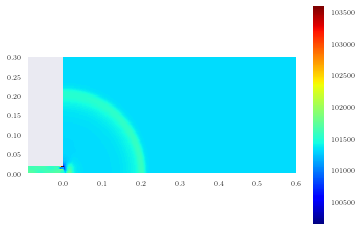

In [68]:
plenum_variables = ["Pressure", "Density", "Momentum_0", "Momentum_1", 'vfrac']
n = GetSize(plenum_path)
(p, rho, rhou, rhov, vols), current_time, extent, plenum_dict = da.h5_load_spec_timepoint_variable(plenum_path, n-10, plenum_variables)

p = np.where(vols > 1e-14, p, np.nan)

pressure_options = {
  'origin': 'lower',
  'interpolation': 'none',
  'cmap': 'jet',
}
im_p = plt.imshow(p, extent=extent, **pressure_options)
cbar = plt.colorbar(im_p)